In [2]:
# %matplotlib Qt5

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from siriuspy.devices import DVF

from mathphys import imgproc as images


def create_gauss1d():
    gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1280, sigma=50, mean=600, amplitude=10)
    return gauss1d, indcs1d

def create_gauss1dsat():
    gauss1dsat, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1024, sigma=50, mean=500, amplitude=300, saturation_threshold=images.FitGaussian.SATURATION_8BITS)
    return gauss1dsat, indcs1d

def create_gauss2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254, rand_amplitude=0, angle=0, offset=0):
    gauss2d, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=indcs, sigma=sigma, mean=mean, amplitude=amplitude, offset=offset, rand_amplitude=rand_amplitude, angle=angle)
    return gauss2d, indcsx2d, indcsy2d

def create_gauss2dsat():
    gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250,
        saturation_threshold=100)
    return gauss2dsat, indcsx2d, indcsy2d

# DVF

In [2]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [3]:
dvf.pvnames

{'CAX:B:BASLER01:CC1:ColorModeOut',
 'CAX:B:BASLER01:CC1:ColorModeOut_RBV',
 'CAX:B:BASLER01:CC1:EnableCallbacks',
 'CAX:B:BASLER01:CC1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:CC1:FalseColor',
 'CAX:B:BASLER01:CC1:FalseColor_RBV',
 'CAX:B:BASLER01:DimFei1:EnableCallbacks',
 'CAX:B:BASLER01:DimFei1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:HDF1:EnableCallbacks',
 'CAX:B:BASLER01:HDF1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:Over1:EnableCallbacks',
 'CAX:B:BASLER01:Over1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:Trans1:EnableCallbacks',
 'CAX:B:BASLER01:Trans1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:cam1:Acquire',
 'CAX:B:BASLER01:cam1:AcquirePeriod',
 'CAX:B:BASLER01:cam1:AcquirePeriod_RBV',
 'CAX:B:BASLER01:cam1:AcquireTime',
 'CAX:B:BASLER01:cam1:AcquireTime_RBV',
 'CAX:B:BASLER01:cam1:Acquire_RBV',
 'CAX:B:BASLER01:cam1:ArrayCallbacks',
 'CAX:B:BASLER01:cam1:ArrayCallbacks_RBV',
 'CAX:B:BASLER01:cam1:ImageMode',
 'CAX:B:BASLER01:cam1:ImageMode_RBV',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks'

In [4]:
dvf.connected

True

In [5]:
dvf.cmd_acquire_on()

True

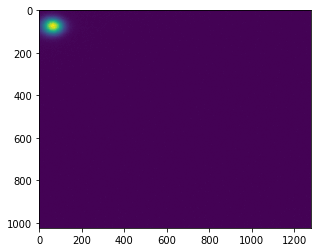

In [10]:
plt.imshow(dvf.image)

In [7]:
data = dvf.image

# FitGauss & FitGaussScipy

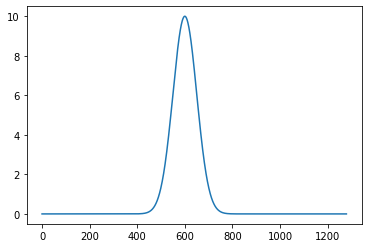

In [2]:
# generate 1D gaussian curve and normalize it

gauss1d, indcs1d = create_gauss1d()
plt.plot(indcs1d, gauss1d)

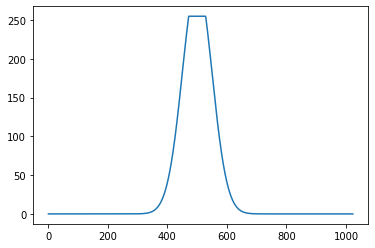

In [3]:
# generate saturated 1D gaussian curve and normalize it

gauss1dsat, indcs1d = create_gauss1dsat()
plt.plot(indcs1d, gauss1dsat)

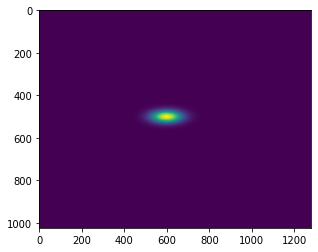

In [4]:
# generate 2D gaussian curve and normalize it

gauss2d, indcsx2d, indcsy2d = create_gauss2d()
plt.imshow(gauss2d)

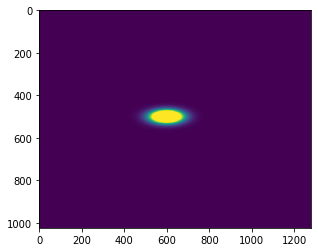

In [5]:
# generate saturated 2D gaussian curve and normalize it

gauss2dsat, indcsx2d, indcsy2d = create_gauss2dsat()
plt.imshow(gauss2dsat)

In [6]:
%timeit data = images.FitGaussian.gaussian(np.arange(1280), sigma=50, mean=500, amplitude=10, offset=0)

25.6 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(indcs=1280, sigma=50, mean=500, amplitude=10)

40.4 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250, saturation_threshold=100)

34.9 ms ± 850 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : None
saturated       : False


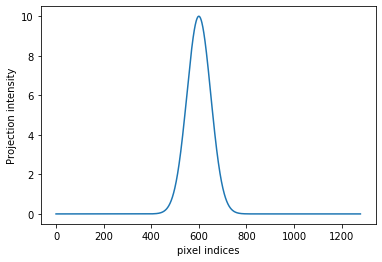

In [2]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D(data=data)
img.imshow()
print(img)

size            : 1024
intensity_min   : 5.2323186718338715e-22
intensity_max   : 255.0
intensity_avg   : 35.07491375352191
intensity_sum   : 35916.71168360644
saturation_val  : None
saturated       : False


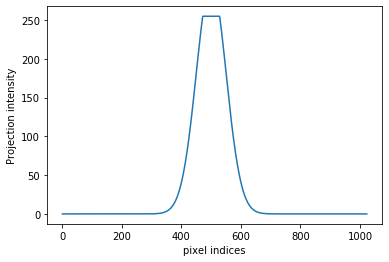

In [3]:
gauss1dsat, indcs1d = create_gauss1dsat()

data = gauss1dsat

img = images.Image1D(data=data)
img.imshow()
print(img)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbf0dbe710>)

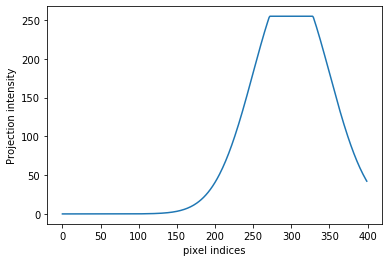

In [11]:
img.imshow(crop=[200,600])

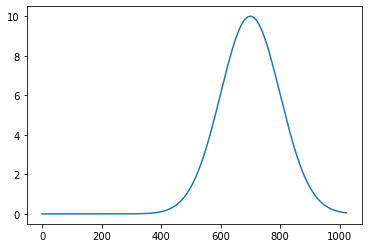

In [12]:
data, indcs = img.generate_gaussian_1d(sigma=100, mean=700, amplitude=10)
plt.plot(indcs, data)

In [13]:
%timeit img = images.Image1D(data=gauss1d)

968 ns ± 7.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Image1D_ROI

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : None
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cbdf62be0>)

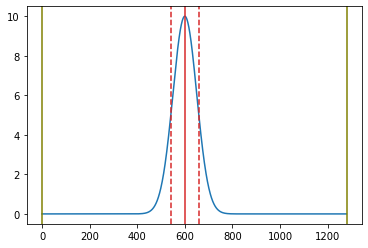

In [4]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_ROI(data=data)
print(img)
img.imshow()

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : None
saturated       : False
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb3a8c588>)

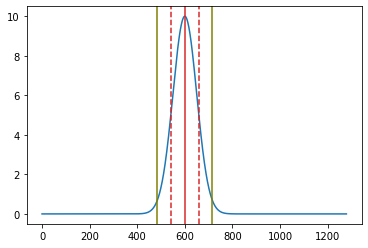

In [5]:
img.update_roi_with_fwhm()
print(img)
img.imshow()

In [16]:
%timeit img = images.Image1D_ROI(data=data)

23.4 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit img.create_trimmed()

21.3 µs ± 501 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb3a83588>)

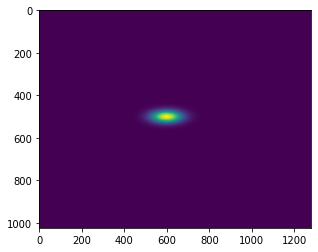

In [6]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.427771901169825e-187
intensity_max   : 255.0
intensity_avg   : 1.2223909403463704
intensity_sum   : 1602212.2533307946
saturation_val  : 80
saturated       : True


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbf0b4e710>)

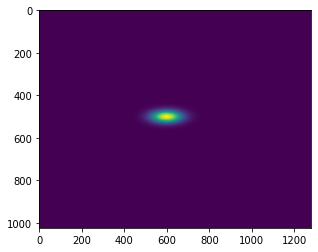

In [19]:
# saturate image for testing 

gauss2dsat, indcsx2d, indcsy2d = create_gauss2d(amplitude=255)

data = gauss2dsat

img = images.Image2D(data=gauss2dsat, saturation_threshold=80)
print(img)
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbf0b2f390>)

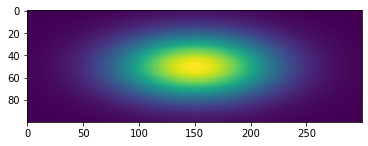

In [20]:
img.imshow(cropx=[450,750], cropy=[450,550])

In [21]:
img.is_saturated

True

In [22]:
# teste intensity threshold

print(img.intensity_max)
print(img.is_with_image)
img.intensity_threshold = 300
print(img.is_with_image)

img = images.Image2D(data=gauss2dsat, intensity_threshold=300)
print(img.is_with_image)

255.0
True
False
False


In [23]:
%timeit img = images.Image2D(data=data)

874 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%timeit img.intensity_min

383 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit img.intensity_sum

348 µs ± 3.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_ROI

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1466772605919399e-36
intensity_max   : 12733.671635125478
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : None
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.0297326410944403e-144
intensity_max   : 31834.179087813704
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : None
saturated       : False
roi             : [0, 1024]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb39d4588>)

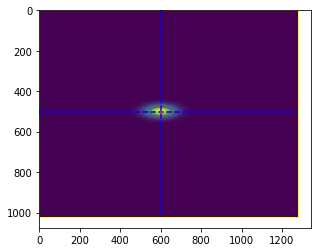

In [7]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D_ROI(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1466772605919399e-36
intensity_max   : 12733.671635125478
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : None
saturated       : False
roi             : [368, 832]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.0297326410944403e-144
intensity_max   : 31834.179087813704
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : None
saturated       : False
roi             : [408, 592]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb3960908>)

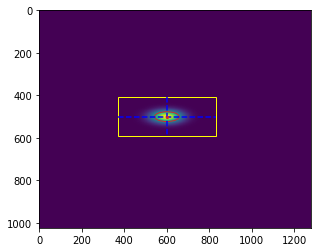

In [8]:
img.update_roi_with_fwhm(fwhmx_factor=4, fwhmy_factor=4)
print(img)
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb394b780>)

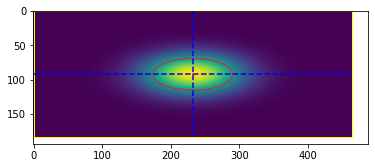

In [9]:
img.imshow(cropx=img.roix, cropy=img.roiy)

In [30]:
%timeit img = images.Image2D_ROI(data)

1.87 ms ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit img.create_trimmed()

231 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_CMom

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ca0777748>)

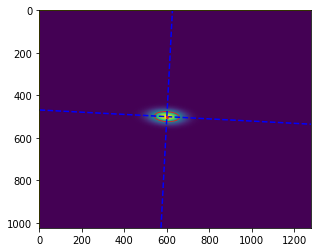

In [8]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d(angle=-3, rand_amplitude=0)

# data = dvf.image
data = gauss2d

img = images.Image2D_CMom(data)
img.imshow()

In [5]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 5.104547434817653e-204
intensity_max   : 254.0
intensity_avg   : 1.217597250384228
intensity_sum   : 1595929.0680236155
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 9.280941566283623e-37
intensity_max   : 12748.345802741465
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : None
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.3021054627310661e-142
intensity_max   : 31607.730296304006
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : None
saturated       : False
roi             : [0, 1024]
roi_center      : 500
roi_fwhm        : 46
--- cmom ---
cmomx           : 600.0
cmomy           : 500.0
cmomxx          : 2494.2479901366864
cmomyy          : 405.75200986331294
cmomxy          : -109

In [9]:
img.roix = [450, 750]
img.roiy = [400, 600]

sizey           : 1024
sizex           : 1280
intensity_min   : 3.800880803869145e-193
intensity_max   : 254.0
intensity_avg   : 1.2175972503842276
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 9.280941566283626e-37
intensity_max   : 12748.345802741465
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : None
saturated       : False
roi             : [450, 750]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.3021054627310663e-142
intensity_max   : 31607.730296304006
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : None
saturated       : False
roi             : [400, 600]
roi_center      : 500
roi_fwhm        : 46
--- cmom ---
cmomx           : 599.9867912824743
cmomy           : 501.33831411144223
cmomxx          : 2428.342481567147
cmomyy          : 407.4099137439

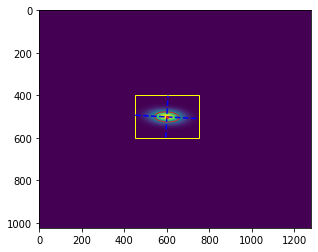

In [10]:
img.imshow()
print(img)

In [37]:
%timeit img = images.Image2D_CMom(data)

35.6 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
%timeit img = images.Image2D_CMom(data, roix=[400,800], roiy=[400,600])

3.49 ms ± 50.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
img.roix = None
img.roiy = None
%timeit img.calc_cmom1(img.imagex, img.imagey)

18.9 µs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
img.roix = [450, 750]
img.roiy = [400, 600]
%timeit img.calc_cmom1(img.imagex, img.imagey)

17.1 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
img.roix = None
img.roiy = None
roixm, roiym = img.roix_meshgrid, img.roiy_meshgrid
%timeit images.Image2D_CMom.calc_cmom(img.data, roixm, roiym, img.imagex.roi, img.imagey.roi, img.cmomx, img.cmomy, 2, 0)

8.87 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
img.roix = [450, 750]
img.roiy = [400, 600]
roixm, roiym = img.roix_meshgrid, img.roiy_meshgrid
%timeit images.Image2D_CMom.calc_cmom(img.data, roixm, roiym, img.imagex.roi, img.imagey.roi, img.cmomx, img.cmomy, 2, 0)

225 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
img.roix = None
img.roiy = None
%timeit img.calc_central_moment(2, 0)

8.94 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
img.roix = [450, 750]
img.roiy = [400, 600]
%timeit img.calc_central_moment(2, 0)

224 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
%timeit img.calc_angle_normal_sigmas(img.cmomxx, img.cmomyy, img.cmomxy)

89.5 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image1D_Fit

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : None
saturated       : False
roi             : [100, 1000]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 10.000000000000096
roi_mean        : 600.0
roi_sigma       : 50.0
roi_fit_err     : 9.594863807312107e-13 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbf0840da0>)

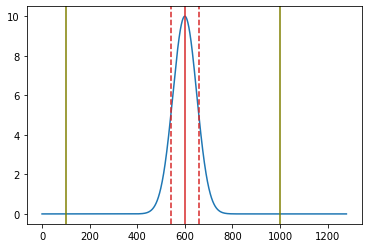

In [47]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_Fit(data=data, roi=[100, 1000])
print(img)
img.imshow()

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : None
saturated       : False
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 10.000000000000007
roi_mean        : 600.0
roi_sigma       : 49.99999999999998
roi_fit_err     : 5.940599195209335e-14 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbf0838b00>)

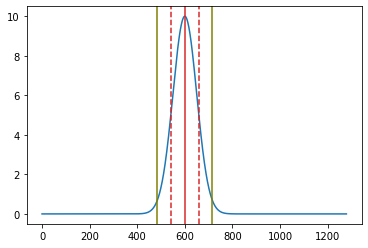

In [48]:
img.update_roi_with_fwhm(fwhm_factor=2)
print(img)
img.imshow()

5.940599195209335e-14


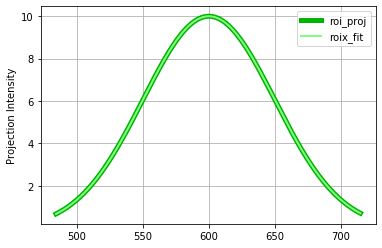

In [49]:
img.plot_projection()
print(img.roi_fit_error)

In [50]:
%timeit img = images.Image1D_Fit(data=data)

579 µs ± 355 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_Fit (FitGaussianScipy)

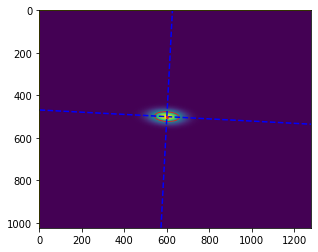

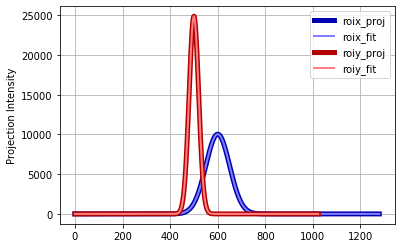

In [11]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

gauss2d, indcsx2d, indcsy2d = create_gauss2d(amplitude=200, rand_amplitude=0, angle=-3)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()

img = images.Image2D_Fit(data=data, intensity_threshold=300, fitgauss=sfg)
# print(img)
img.imshow()
img.plot_projections()

In [12]:
roix, roiy = img.calc_roi_with_fwhm(img, 5, 5)
print('roix: ', roix)
print('roiy: ', roiy)

roix:  [310, 890]
roiy:  [385, 615]


In [13]:
img = images.Image2D_Fit(data=data, fitgauss=sfg, roix=roix, roiy=roiy)

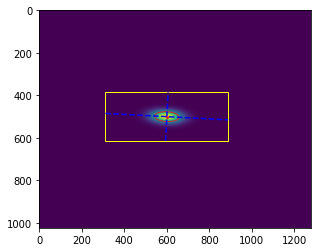

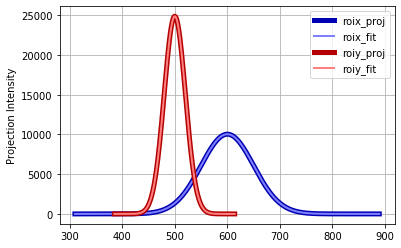

In [14]:
img.imshow()
img.plot_projections()

In [15]:
roix = [300, 900]
roiy = [380, 600]
# roix = None
# roiy = None
img.roi = roix, roiy
img.calc_angle_normal_sigmas()

(-2.999970209882202, 49.9999988524096, 20.000002868975724)

In [56]:
%timeit img = images.Image2D_Fit(data=data, fitgauss=sfg)

17.4 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
roix = [300, 900]
roiy = [380, 600]
%timeit img = images.Image2D_Fit(data=data, fitgauss=sfg, roix=roix, roiy=roiy)

5.52 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
roix = None
roiy = None
img.roi = roix, roiy
%timeit img.calc_angle_normal_sigmas()

11.8 ms ± 9.84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
roix = [300, 900]
roiy = [380, 600]
img.roi = roix, roiy
%timeit img.calc_angle_normal_sigmas()

753 µs ± 3.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
